In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import Counter
from multiprocessing import Pool
import import_ipynb
import itertools
import json
import sys

In [2]:
from metric_util_func_py import *

In [3]:
folder="../dataset_v5/v5_2/"

In [4]:
save_dir = "graphs_v5_2_7_2"

In [5]:
mod_ment2 = pd.read_csv(folder+'v5_2_2/'+'final_shodhganga_dataset_v5_2_7_2.csv', sep =",")

In [6]:
mod_ment2['new_date_awarded']= mod_ment2['new_date_awarded'].fillna("2019-05-01")

In [7]:
inx_to_inst = dict(zip(mod_ment2.instituteId,mod_ment2.publisher_institution))

[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
[[0, 0, 0, 0, 0, 1, 660, 5125, 7064], [0, 0, 0, 43, 178, 601, 1744, 4128, 4542], [0, 1, 83, 804, 2303, 4096, 5710, 7057, 9864], [0, 0, 0, 0, 1, 101, 461, 1566, 6617], [1, 1, 22, 110, 389, 937, 1635, 3137, 4086], [2, 7, 45, 305, 884, 1862, 2769, 4620, 6620], [1, 1, 1, 1, 1, 23, 128, 186, 432], [0, 0, 0, 18, 206, 730, 1445, 2715, 4658], [0, 0, 18, 200, 573, 1073, 1656, 2378, 3386], [0, 0, 7, 25, 117, 365, 959, 1673, 4909], [1, 1, 1, 1, 1, 3, 30, 532, 1213], [0, 0, 17, 163, 369, 721, 1111, 1473, 1618], [0, 0, 104, 548, 1337, 2765, 4130, 6209, 8591], [1, 1, 1, 1, 1, 61, 338, 732, 1091], [0, 0, 15, 82, 288, 634, 1302, 2266, 2905], [1, 1, 1, 58, 201, 499, 830, 1271, 2385], [1, 2, 49, 206, 601, 1135, 1646, 2306, 3099], [0, 0, 1, 15, 193, 620, 1326, 2575, 3386], [0, 3, 55, 312, 1099, 2224, 3385, 4892, 6612], [1, 1, 1, 1, 1, 4, 348, 1278, 2585], [1, 1, 3, 30, 140, 689, 1718, 2693, 2934], [13, 14, 17, 59, 293, 718, 1345, 2368, 4381]]
['V. B.

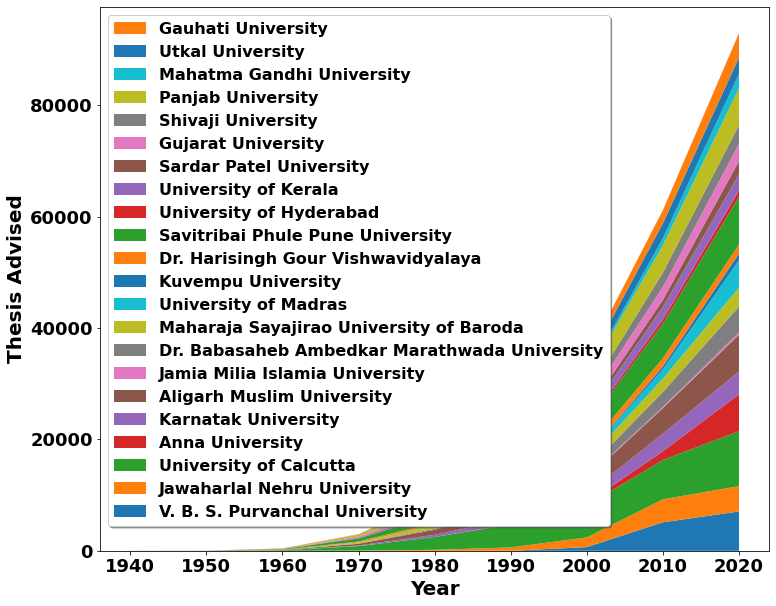

In [8]:
year_wise_inst_dist, ax6 = draw_area_plot(mod_ment2, inx_to_inst=inx_to_inst)
fig6=ax6.get_figure()
fig6.savefig('../'+save_dir+'/inst_stackplot_with_thesis.pdf',bbox_inches='tight')

In [9]:
#abc

In [10]:
# graph1 = nx.convert_matrix.from_pandas_edgelist(mod_ment2, 'advId','resId','instituteId', create_using=nx.DiGraph())
# graph1.remove_edges_from(nx.selfloop_edges(graph1))
# cycle=list(nx.simple_cycles(graph1))
# graph1.remove_edges_from(cycle)

9
[0.4285714285714286, 0.6419753086419753, 0.16666666666666663, 0.07017543859649122, 0.10344827586206895, 0.33333333333333337, 0.38235294117647056, 0.35820895522388063]
[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]


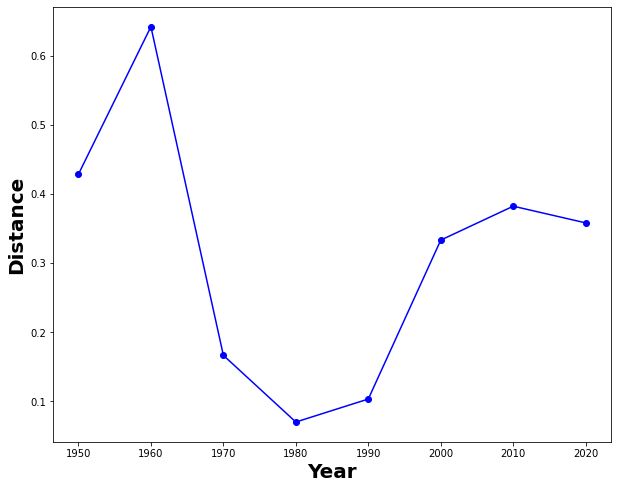

In [11]:
rank_list1,ax1 = draw_rank_dist(df=mod_ment2, inx_to_inst=inx_to_inst,from_y=1940, to_y=2020, step_size=10, title="")
fig1=ax1.get_figure()
fig1.savefig('../new_graphs/inst_rank_plot_with_thesis.pdf',bbox_inches='tight')

In [12]:
#rank_list2,ax2 = draw_rank_dist(df=mod_ment2, inx_to_inst=inx_to_inst,from_y=1940, to_y=2020, step_size=5, title="Inst. Rank (Based on thesis advised) Distance Plot")

9
[0.22580645161290325, 0.8297872340425532, 0.7058823529411764, 0.33333333333333337, 0.3076923076923077, 0.13559322033898302, 0.28125, 0.5526315789473684]
[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]


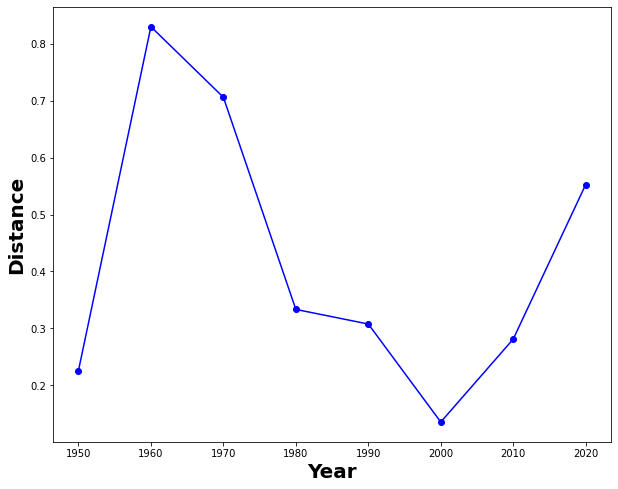

In [13]:
rank_list3,ax3=draw_rank_dist(df=mod_ment2,inx_to_inst=inx_to_inst,from_y=1940, to_y=2020, step_size=10, func1=inst_wise_val, func2=other_metrics1, metric=2, title="")
# fig3=ax3.get_figure()
# fig3.savefig('graphs/inst_rank_plot_with_fertility.png',bbox_inches='tight')

9
[0.22580645161290325, 0.8297872340425532, 0.7058823529411764, 0.33333333333333337, 0.25396825396825395, 0.25396825396825395, 0.28125, 0.5333333333333333]
[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]


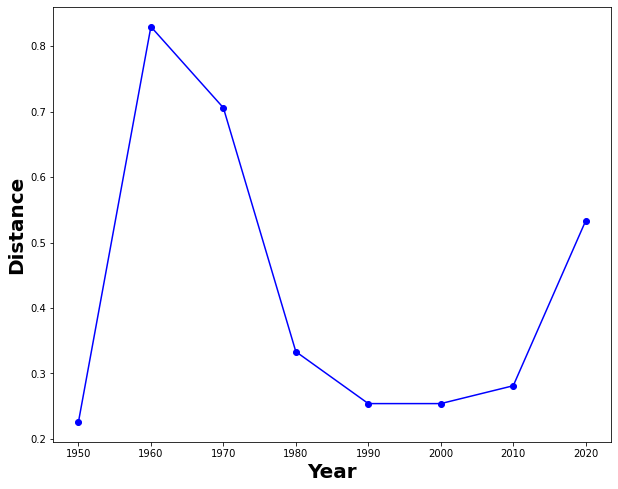

In [14]:
rank_list4,ax4=draw_rank_dist(df=mod_ment2,inx_to_inst=inx_to_inst,from_y=1940, to_y=2020, step_size=10, func1=inst_wise_val, func2=other_metrics1, metric=3, title="")
# fig4=ax4.get_figure()#Inst. Rank (Based on h-index value) Distance Plot
# fig4.savefig('graphs/inst_rank_plot_with_h_index.png',bbox_inches='tight')

9
[0.22580645161290325, 0.8297872340425532, 0.735632183908046, 0.22580645161290325, 0.35820895522388063, 0.16666666666666663, 0.35820895522388063, 0.45070422535211263]
[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]


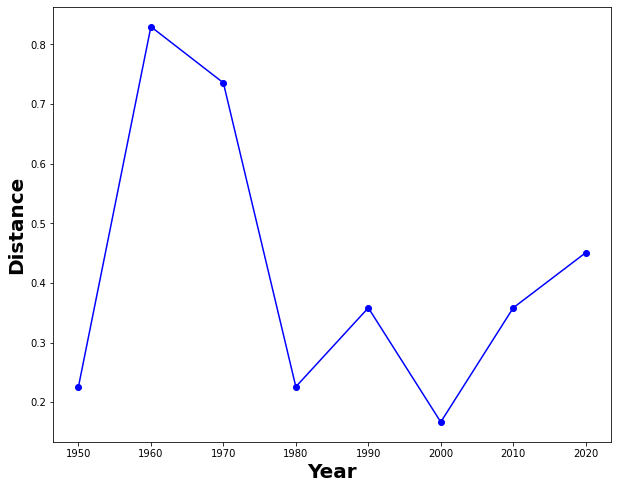

In [15]:
rank_list5,ax5=draw_rank_dist(df=mod_ment2,inx_to_inst=inx_to_inst,from_y=1940, to_y=2020, step_size=10, func1=inst_wise_val, func2=other_metrics1, metric=4, title="")#Inst. Rank (Based on g-index value) Distance Plot
# fig5=ax5.get_figure()
# fig5.savefig('graphs/inst_rank_plot_with_g_index.png',bbox_inches='tight')

In [16]:
#rank_list1[0]

In [17]:
label1,data1,rank_list1 = mod_draw_rank_dist(df=mod_ment2, inx_to_inst=inx_to_inst,from_y=1940, to_y=2020, step_size=10)

label2,data2,rank_list2 = mod_draw_rank_dist(df=mod_ment2,inx_to_inst=inx_to_inst,from_y=1940, to_y=2020, step_size=10, func1=inst_wise_val, func2=other_metrics1, metric=2)

label3,data3,rank_list3 = mod_draw_rank_dist(df=mod_ment2,inx_to_inst=inx_to_inst,from_y=1940, to_y=2020, step_size=10, func1=inst_wise_val, func2=other_metrics1, metric=3)

label4,data4,rank_list4 = mod_draw_rank_dist(df=mod_ment2,inx_to_inst=inx_to_inst,from_y=1940, to_y=2020, step_size=10, func1=inst_wise_val, func2=other_metrics1, metric=4)

9
9
9
9


In [18]:
mod_ment2 = mod_ment2.set_index('new_date_awarded')

In [19]:
df_filter=mod_ment2.loc[:"2010-01-01"].copy()

In [20]:
df_filter.shape

(99980, 23)

In [21]:
df_filter["publisher_institution"].value_counts()[:12]

University of Calcutta                          7065
Savitribai Phule Pune University                6561
V. B. S. Purvanchal University                  5206
Aligarh Muslim University                       5013
Panjab University                               4904
Jawaharlal Nehru University                     4393
Karnatak University                             3143
Dr. Babasaheb Ambedkar Marathwada University    2724
Utkal University                                2705
Shivaji University                              2579
University of Kerala                            2469
Sri Krishnadevaraya University                  2396
Name: publisher_institution, dtype: int64

In [22]:
df_filter1=mod_ment2.loc[:"2020-01-01"].copy()

In [23]:
df_filter1.shape

(201477, 23)

In [24]:
df_filter1["publisher_institution"].value_counts()

University of Calcutta                                                              9909
Savitribai Phule Pune University                                                    9249
V. B. S. Purvanchal University                                                      7420
Aligarh Muslim University                                                           7120
Panjab University                                                                   6681
                                                                                    ... 
Lingayas University                                                                    1
SGT University                                                                         1
Madhya Pradesh Bhoj (Open) University                                                  1
J. R. N. Rajasthan Vidyapeeth University                                               1
Indian Institute of Information Technology Design and Manufacturing Kancheepuram       1
Name: publisher_insti

In [25]:
# fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(label1, data1, color="r", marker='o',label="Rank with thesis advised")
# ax.plot(label2, data2, color="b", marker='o',label="Rank with fertiltiy")
# ax.plot(label3, data3, color="g", marker='o',label="Rank with $h_m$-index")
# ax.plot(label4, data4, color="y", marker='o',label="Rank with $g_m$-index")
# plt.yticks(fontsize=18, fontweight='bold')
# plt.xticks(fontsize=18, fontweight='bold')
# ax.set_title("")
# ax.set_ylabel("Distance",fontweight='bold',fontsize=20)
# ax.set_xlabel("Year",fontweight='bold',fontsize=20)
# ax.legend(loc='upper right',fancybox=True, shadow=True,prop={"weight":'bold',"size":18})
# plt.savefig('../'+save_dir+'/combined_inst_rank_distance_plot_last_all_included.pdf',bbox_inches='tight')
# plt.show()

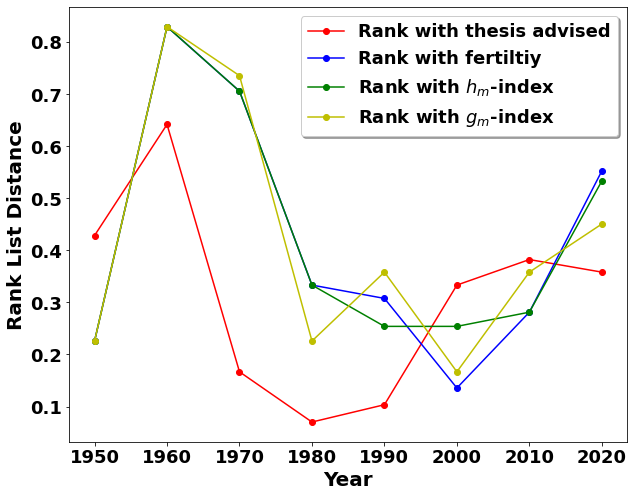

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(label1, data1, color="r", marker='o',label="Rank with thesis advised")
ax.plot(label2, data2, color="b", marker='o',label="Rank with fertiltiy")
ax.plot(label3, data3, color="g", marker='o',label="Rank with $h_m$-index")
ax.plot(label4, data4, color="y", marker='o',label="Rank with $g_m$-index")
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
ax.set_title("")
ax.set_ylabel("Rank List Distance",fontweight='bold',fontsize=20)
ax.set_xlabel("Year",fontweight='bold',fontsize=20)
ax.legend(loc='upper right',fancybox=True, shadow=True,prop={"weight":'bold',"size":18})
plt.savefig('../'+save_dir+'/combined_inst_rank_distance_plot.pdf',bbox_inches='tight')
plt.show()

In [13]:
#mod_ment2[mod_ment2['instituteId']]

In [15]:
#mod_ment2.columns

In [ ]:
# graph1 = nx.convert_matrix.from_pandas_edgelist(mod_ment2, 'advId','resId','instituteId', create_using=nx.DiGraph())
# graph1.remove_edges_from(nx.selfloop_edges(graph1))
# cycle=list(nx.simple_cycles(graph1))
# graph1.remove_edges_from(cycle)

In [ ]:
# components1 = list(nx.weakly_connected_components(graph1))
# components1.sort(key=len, reverse=True)
# subgraph = graph1.subgraph(components1[0])

In [ ]:
#!pip install d3fdgraph

In [ ]:
#import d3fdgraph

In [ ]:
#_=d3fdgraph.plot_force_directed_graph(graph.loc[0:10],node_radius=10)

In [ ]:
#pr=nx.pagerank(graph1, alpha=0.9)

In [ ]:
#pr_sorted=dict(sorted(pr.items(), key=lambda item: item[1], reverse=True))

In [ ]:
#pr_sorted

In [14]:
#mod_ment2[mod_ment2['resId']==103862]